# Task- Develop a neural network that can read handwriting

# Dataset used- MNIST 

# By Raunak Ghosh

# Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import tensorflow as tf
from tensorflow import keras
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Conv2D, MaxPooling2D

# Dataset Loading

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

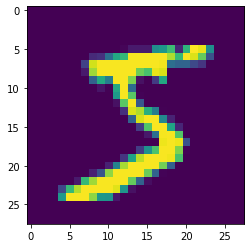

In [3]:
plt.imshow(x_train[0])

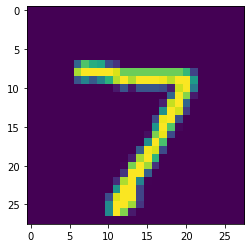

In [4]:
plt.imshow(x_test[0])

In [5]:
print(y_train[0])

5


In [6]:
print(y_test[0])

7


# Displaying some other images

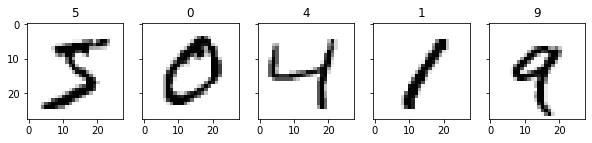

In [7]:
fig, axes=plt.subplots(ncols=5, sharex=False, sharey=True,figsize=(10,4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray_r')
plt.show()

# Preprocessing the data

In [8]:
print('Training images shape : ',x_train.shape)
print('Testing images shape : ',x_test.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [9]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [10]:
#Normalizing the data:-
x_train=x_train/255.0
x_testg=x_test/255.0

In [11]:
input_shape=(28,28,1)
num_classes=10

In [12]:
#Checking the dimension:-
print(x_train.shape)

(60000, 28, 28, 1)


In [13]:
print(x_test.shape)

(10000, 28, 28, 1)


# Creating a CNN Model:-

In [14]:
model=Sequential()

#Adding the first convolution layer:-
model.add(Conv2D(64, kernel_size=(3,3),input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Adding the second convolution layer:-
model.add(Conv2D(64, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Adding the third convolution layer:-
model.add(Conv2D(64, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#First fully connected layer:-
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

#Second fully connected layer:-
model.add(Dense(32))
model.add(Activation('relu'))

#Third fully connected layer:-
model.add(Dense(10))
model.add(Activation('softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [16]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
model.fit(x_train,y_train,epochs=10,validation_split=0.25,batch_size=50)

Epoch 1/10
900/900 [==============================] - 59s 66ms/step - loss: 0.0183 - accuracy: 0.9943 - val_loss: 0.0576 - val_accuracy: 0.9855
Epoch 2/10
900/900 [==============================] - 54s 61ms/step - loss: 0.0147 - accuracy: 0.9952 - val_loss: 0.0550 - val_accuracy: 0.9860
Epoch 3/10
900/900 [==============================] - 50s 55ms/step - loss: 0.0146 - accuracy: 0.9952 - val_loss: 0.0627 - val_accuracy: 0.9847
Epoch 4/10
900/900 [==============================] - 55s 61ms/step - loss: 0.0132 - accuracy: 0.9957 - val_loss: 0.0588 - val_accuracy: 0.9861
Epoch 5/10
900/900 [==============================] - 48s 54ms/step - loss: 0.0102 - accuracy: 0.9967 - val_loss: 0.0628 - val_accuracy: 0.9861
Epoch 6/10
900/900 [==============================] - 56s 62ms/step - loss: 0.0130 - accuracy: 0.9958 - val_loss: 0.0557 - val_accuracy: 0.9865
Epoch 7/10
900/900 [==============================] - 59s 65ms/step - loss: 0.0089 - accuracy: 0.9969 - val_loss: 0.0664 - val_accuracy:

# Model Evaluation 

In [19]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("test accuracy",test_acc)
print("test loss",test_loss)

313/313 [==============================] - 4s 11ms/step - loss: 90.3641 - accuracy: 0.9417
test accuracy 0.9416999816894531
test loss 90.36408996582031


# Testing with custom image

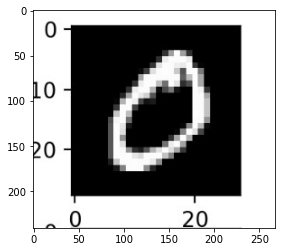

In [20]:
img=cv2.imread('sampleimage.jpg')
plt.imshow(img)

In [21]:
img.shape

(241, 268, 3)

In [22]:
img=cv2.resize((cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)), (28,28))

In [23]:
img.shape

(28, 28)

In [24]:
img=img/255

In [26]:
img = np.array(img).reshape(-1,28,28,1)

In [27]:
print(np.argmax(model.predict(img)))

1/1 [==============================] - 0s 308ms/step
6
